In [1]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

In [3]:
df = pd.read_csv('youtube_chat_jogja_clean.csv')

In [4]:
df.head(10)

,datetime,author_name,message,cleaned_message,label
0,2024-10-07 08:32:03,KUSUMA,assalamu'alaikum..,assalamualaikum,0
1,2024-10-07 08:58:42,Tata PaNda,wa'alaikumussalam,waalaikumussalam,0
2,2024-10-07 09:20:29,Nimas putri Paranata,udah lewat 22 menit ni,udah lewat 22 menit ni,0
3,2024-10-07 09:30:23,proboyuwono djogdja,16:30 wib,1630 wib,0
4,2024-10-07 09:34:59,Vian Noorcha Putra,Tribun Tv Mana Ini Kenapa Acaranya Belum Dimul...,tribun tv mana ini kenapa acaranya belum dimul...,0
5,2024-10-07 09:37:04,Vian Noorcha Putra,Saya Nonton Apa Ini Tribun Tv Kenapa Acara Way...,saya nonton apa ini tribun tv kenapa acara way...,0
6,2024-10-07 09:47:46,Heri Agus,kapan mulainya min? pengen keburu nonton,kapan mulainya min pengen keburu nonton,0
7,2024-10-07 10:04:01,Deden Abd,assalamu'alaikum,assalamualaikum,0
8,2024-10-07 10:04:51,W,lama,lama,0
9,2024-10-07 10:06:28,Iann_febri,ini nanti bakal live disini taa?,ini nanti bakal live disini taa,0


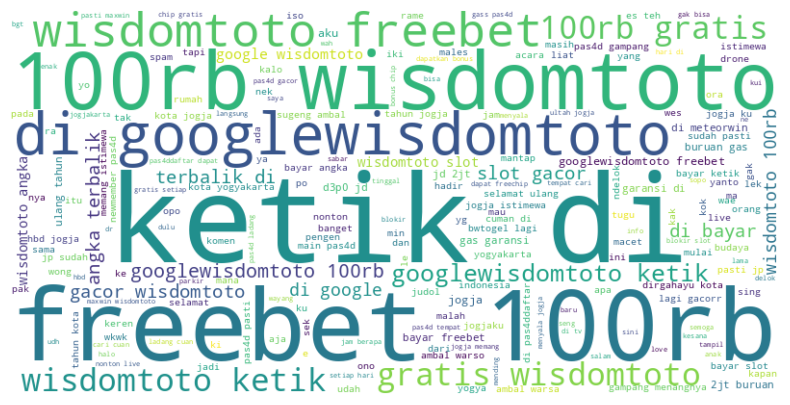

In [5]:
from wordcloud import WordCloud
all_text = ' '.join(df['cleaned_message'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar stopwords kustom untuk Bahasa Indonesia
stop_words_id = set(stopwords.words('indonesian'))

# Fungsi preprocessing
def preprocess_text(text):
    # Tokenisasi
    tokens = word_tokenize(text)
    # Penghapusan stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words_id]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

# Terapkan fungsi preprocessing ke kolom 'text'
df['cleaned_message'] = df['cleaned_message'].astype(str).apply(preprocess_text)


In [8]:
df

,datetime,author_name,message,cleaned_message,label
0,2024-10-07 08:32:03,KUSUMA,assalamu'alaikum..,[assalamualaikum],0
1,2024-10-07 08:58:42,Tata PaNda,wa'alaikumussalam,[waalaikumussalam],0
2,2024-10-07 09:20:29,Nimas putri Paranata,udah lewat 22 menit ni,"[udah, 22, menit, ni]",0
3,2024-10-07 09:30:23,proboyuwono djogdja,16:30 wib,"[1630, wib]",0
4,2024-10-07 09:34:59,Vian Noorcha Putra,Tribun Tv Mana Ini Kenapa Acaranya Belum Dimul...,"[tribun, tv, acara, wayang, jogja, night, carn...",0
...,...,...,...,...,...
6345,2024-10-07 14:22:01,may,"Met ultah kotakuu,love you","[met, ultah, kotakuulove, you]",0
6346,2024-10-07 14:22:01,Johnnie Boyles,𝗱𝟯𝗣𝟬 𝟭𝟬𝟬 j𝗱 𝟮𝗷𝘁 buruan gas 𝗚𝗔𝗥𝗔𝗡𝗦𝗜 𝟭𝟬𝟬% di :fi...,"[d3p0, 100, jd, 2jt, buru, gas, garansi, 100, ...",1
6347,2024-10-07 14:22:02,JURAGAN99,:hand-pink-waving: NATUNATOTO:hand-pink-waving...,"[handpinkwaving, natunatotohandpinkwavingpasti...",0
6348,2024-10-07 14:22:06,Nunung Kusmawati,menyala jogjaku:fire::fire:,"[nyala, jogjaku]",0


In [9]:
df['cleaned_message'] = df['cleaned_message'].apply(lambda x: [re.sub(r'\bd3p0\b', 'depo', word) for word in x])

In [10]:
def split_toto(word):
    return re.sub(r'(\w*toto\w*)', lambda match: match.group(0)[:match.start(1)] + ' ' + match.group(0)[match.end(1):], word)

# Terapkan fungsi untuk memisahkan kata yang mengandung 'toto'
df['cleaned_message'] = df['cleaned_message'].apply(lambda x: [split_toto(word) for word in x])

In [11]:
# Gabungkan token menjadi satu string untuk setiap pesan
df['cleaned_message'] = df['cleaned_message'].apply(lambda x: ' '.join(x))

In [12]:
def token(message):
    # Remove numbers
    message_no_numbers = re.sub(r'\d+', '', message)
    # Tokenize
    tokens = word_tokenize(message_no_numbers)
    return tokens

df['cleaned_message'] = df['cleaned_message'].apply(token)

In [13]:
df

,datetime,author_name,message,cleaned_message,label
0,2024-10-07 08:32:03,KUSUMA,assalamu'alaikum..,[assalamualaikum],0
1,2024-10-07 08:58:42,Tata PaNda,wa'alaikumussalam,[waalaikumussalam],0
2,2024-10-07 09:20:29,Nimas putri Paranata,udah lewat 22 menit ni,"[udah, menit, ni]",0
3,2024-10-07 09:30:23,proboyuwono djogdja,16:30 wib,[wib],0
4,2024-10-07 09:34:59,Vian Noorcha Putra,Tribun Tv Mana Ini Kenapa Acaranya Belum Dimul...,"[tribun, tv, acara, wayang, jogja, night, carn...",0
...,...,...,...,...,...
6345,2024-10-07 14:22:01,may,"Met ultah kotakuu,love you","[met, ultah, kotakuulove, you]",0
6346,2024-10-07 14:22:01,Johnnie Boyles,𝗱𝟯𝗣𝟬 𝟭𝟬𝟬 j𝗱 𝟮𝗷𝘁 buruan gas 𝗚𝗔𝗥𝗔𝗡𝗦𝗜 𝟭𝟬𝟬% di :fi...,"[depo, jd, jt, buru, gas, garansi, meteorwin]",1
6347,2024-10-07 14:22:02,JURAGAN99,:hand-pink-waving: NATUNATOTO:hand-pink-waving...,"[handpinkwaving, gacorhandpinkwavinghandpinkwa...",0
6348,2024-10-07 14:22:06,Nunung Kusmawati,menyala jogjaku:fire::fire:,"[nyala, jogjaku]",0


## Word2Vec

In [17]:
from gensim.models import Word2Vec
import numpy as np
# Train Word2Vec model
modelw2v = Word2Vec(df['cleaned_message'], vector_size=100, window=5, min_count=1, workers=4)


In [18]:
def average_vector(comment, model, vector_size):
    vectors = [model.wv[word] for word in comment if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [19]:
vector_size = modelw2v.vector_size
X = np.array([average_vector(comment, modelw2v, vector_size) for comment in df['cleaned_message']])

In [20]:
from sklearn.model_selection import train_test_split
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['cleaned_message'] = df['cleaned_message'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform pada kolom cleaned_message
x_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_message'])

# Label
y = df['label']

# Split data menjadi train dan test
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

# Tampilkan bentuk data setelah TF-IDF
X_train_tfidf.shape, X_test_tfidf.shape, len(y_train_tfidf), len(y_test_tfidf)

((5080, 3423), (1270, 3423), 5080, 1270)

# RNN

In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [17]:
# Ubah bentuk TF-IDF menjadi 3D untuk SimpleRNN (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Membuat model RNN
model = Sequential()
model.add(SimpleRNN(128, input_shape=(X_train_rnn.shape[1], 1), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))  # Output sesuai jumlah kelas

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,961 (97.50 KB)

 Trainable params: 24,961 (97.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Latih model
history = model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.7090 - loss: 0.5412 - val_accuracy: 0.7496 - val_loss: 0.4957
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.6393 - loss: 0.5850 - val_accuracy: 0.5228 - val_loss: 0.6835
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.5126 - loss: 0.6821 - val_accuracy: 0.5228 - val_loss: 0.6837
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.5056 - loss: 0.6848 - val_accuracy: 0.5228 - val_loss: 0.6831
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5216 - loss: 0.6819 - val_accuracy: 0.5173 - val_loss: 0.6876
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.5017 - loss: 0.6893 - val_accuracy: 0.4937 - val_loss: 0.6927
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.5127 - loss: 0.6976 - val_accuracy: 0.4906 - val_loss: 0.7314
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.5238 - loss: 0.7311 - 

# SVM(word2vec)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_svm = svm_model.predict(X_test)

# Evaluasi hasil prediksi
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")

# Menampilkan classification report untuk detail lebih lanjut
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.8574803149606299
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       647
           1       0.84      0.87      0.86       623

    accuracy                           0.86      1270
   macro avg       0.86      0.86      0.86      1270
weighted avg       0.86      0.86      0.86      1270



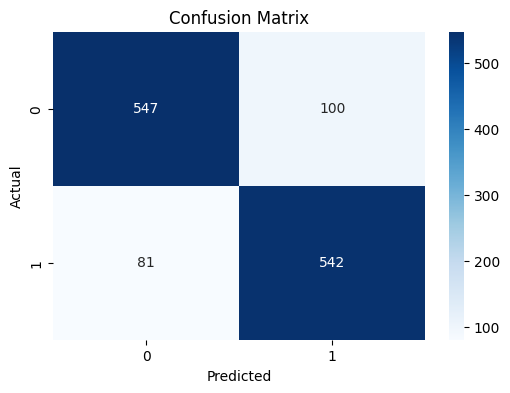

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# SVM(TF-IDF)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train_tfidf)

# Prediksi pada data test
y_pred_svm_tfidf = svm_model.predict(X_test_tfidf)

# Evaluasi hasil prediksi
accuracy = accuracy_score(y_test_tfidf, y_pred_svm_tfidf)
print(f"Accuracy: {accuracy}")

# Menampilkan classification report untuk detail lebih lanjut
print(classification_report(y_test_tfidf, y_pred_svm_tfidf))


Accuracy: 0.9968503937007874
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       647
           1       1.00      1.00      1.00       623

    accuracy                           1.00      1270
   macro avg       1.00      1.00      1.00      1270
weighted avg       1.00      1.00      1.00      1270



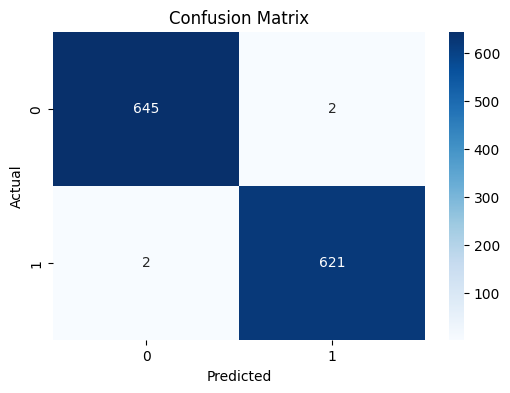

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test_tfidf, y_pred_svm_tfidf)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RandomForest (word2vec)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Prediksi
y_pred = rf_classifier.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9984251968503937
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       647
           1       1.00      1.00      1.00       623

    accuracy                           1.00      1270
   macro avg       1.00      1.00      1.00      1270
weighted avg       1.00      1.00      1.00      1270



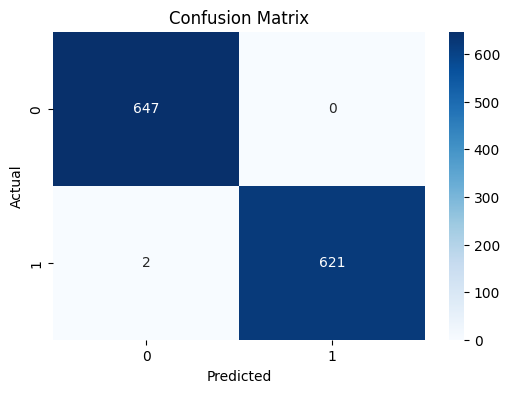

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RandomForest (TFIDF)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train_tfidf)

# Prediksi
y_pred_tfidf = rf_classifier.predict(X_test_tfidf)

# Evaluasi
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf))


Accuracy: 0.9984251968503937
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       647
           1       1.00      1.00      1.00       623

    accuracy                           1.00      1270
   macro avg       1.00      1.00      1.00      1270
weighted avg       1.00      1.00      1.00      1270



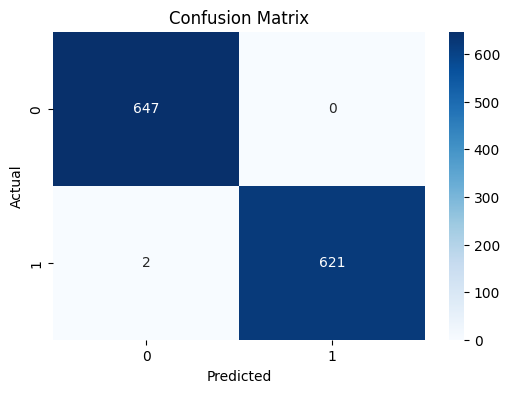

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test_tfidf, y_pred_tfidf)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
data_test = pd.read_csv('filtered_youtube bersih.csv')
data_test.head(5)

,Komentar,Penulis,Likes,Published_at,balasan
0,w body guard bro,@RATZ-p3f,0,2024-12-02T12:14:50Z,NaN
1,p,@montoonf9,1,2024-12-02T08:32:05Z,NaN
2,p,@montoonf9,1,2024-12-02T08:31:56Z,NaN
3,les go to papua,@montoonf9,1,2024-12-02T08:31:41Z,NaN
4,black like me,@SriKandi-y6o,1,2024-12-02T06:44:10Z,NaN


In [23]:
data_test['Komentar'] = data_test['Komentar'].astype(str).apply(preprocess_text)
data_test['Komentar'] = data_test['Komentar'].apply(lambda x: [re.sub(r'\bd3p0\b', 'depo', word) for word in x])
data_test['Komentar'] = data_test['Komentar'].apply(lambda x: [split_toto(word) for word in x])
data_test['Komentar'] = data_test['Komentar'].apply(lambda x: ' '.join(x))


In [91]:
data_test['Komentar'] = data_test['Komentar'].apply(token)

In [92]:
data_test

,Komentar,Penulis,Likes,Published_at,balasan,label
0,"[w, body, guard, bro]",@RATZ-p3f,0,2024-12-02T12:14:50Z,NaN,0
1,[p],@montoonf9,1,2024-12-02T08:32:05Z,NaN,0
2,[p],@montoonf9,1,2024-12-02T08:31:56Z,NaN,0
3,"[les, go, to, papua]",@montoonf9,1,2024-12-02T08:31:41Z,NaN,0
4,"[black, like, me]",@SriKandi-y6o,1,2024-12-02T06:44:10Z,NaN,1
...,...,...,...,...,...,...
37332,"[real, cristiano, ronaldo, fans, vote, here]",@BOSS-GAMING-1123,2,2024-09-18T13:19:32Z,ngemis like,0
37333,"[bonus, deposit, bonus, sikat]",@IMMORTAL_FF_7,0,2024-09-18T13:19:32Z,NaN,0
37334,"[the, amount, of, shady, advertising, and, the...",@张俊贤-t7e,0,2024-09-18T13:19:32Z,NaN,0
37335,"[zombies, million, views, exploring, indonesia...",@LEGENDUMAR,292,2024-09-18T13:19:32Z,also boxing lol nami no naomi fr broo time ski...,0


In [93]:
# Drop baris yang memiliki string 'nan' atau string kosong
data_test = data_test[data_test['Komentar'].str.strip().str.lower() != 'nan']  # Case insensitive
data_test = data_test[data_test['Komentar'].str.strip() != '']  # Remove empty strings

AttributeError: Can only use .str accessor with string values!

In [95]:
#tfidf = TfidfVectorizer(max_features=300)
test_data = np.array([average_vector(comment, modelw2v, vector_size) for comment in data_test['Komentar']])

In [96]:
len(test_data)

34402

In [97]:
data_test['Komentar'].isnull().sum()

0

In [102]:
test_data

array([[ 0.00272593,  0.00624251, -0.00742992, ..., -0.0056659 ,
         0.00114068, -0.00146089],
       [ 0.00255958,  0.00730423,  0.00783554, ..., -0.00655882,
        -0.00420663,  0.0004136 ],
       [ 0.00255958,  0.00730423,  0.00783554, ..., -0.00655882,
        -0.00420663,  0.0004136 ],
       ...,
       [ 0.00181825,  0.03881104, -0.0029166 , ...,  0.01060744,
        -0.01085965, -0.00427095],
       [-0.00073734,  0.06599689, -0.00947242, ...,  0.00305422,
        -0.02074786,  0.00669259],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [98]:
hasil = rf_classifier.predict(test_data)

In [99]:
hasil.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [107]:
data_test['label_judol'] = hasil.tolist()

In [108]:
data_test['label_judol'].value_counts()

,count
label_judol,
0,34269
1,133


In [111]:
data_test.drop('label', axis=1, inplace=True)

In [116]:
train_data, test_data = train_test_split(data_lgi, train_size=1000, random_state=42)

In [118]:
train_data.to_csv('train_sentiment_2.csv', index=False)

In [119]:
test_data.to_csv('test_sentiment.csv', index=False)